# Diabetes Classification Project


## Summary & Objectives
We are given a task to create a predictive classifer that will determine whether a patient has diabetes or not given a set of diagnostic information. The goal & impact of this classifier is to assist staff in the medical care and diagnosis of patients.

The goals are:
*   The classifer should be able to correctly predict diabetes for a patient 75% of the time in order to help get patients treated correctly.
*   The classifer should falsely predict diabetes less than 35% of the time to avoid falsely diagnosing too many patients.
*   These models should be able to perform well on new data to ensure that models maintain accuracy on new information.
*   The ML team should present ideas for future improvement if addition budget and time is available

In [ ]:
# Import
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

## Data Importing, Preprocessing, and Feature Engineering

### Data Importing

In [ ]:
# Data Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
data_path = 'https://raw.githubusercontent.com/stevensantos17/Diabetes_Classification_Project/main/Data/diabetes.csv'
input_df = pd.read_csv(data_path)

### Data Preprocessing

The first step is to gather insights on the given data including:

*   Detection & Handling of missing data
*   Review the Distribution of feature values
*   Determine if there is a class imbalance problem
*   Standardize Data to improve ML performance



**Analysis**

*   The features **(Blood Pressure, BMI, and Glucose)** appear to have some outlier values that may indicate missing values. Looking at the feature histograms, values of 0 may be an outlier. In context, these features would normally not be 0, only in extreme cases. This may indicate that a value of 0 was chosen when that diagnostic value could not be recorded. Further investigation would be needed to determine if these 0 values are valid. If these are indeed default values, we would handle them like missing values and substitute each 0 value for the mean of a given feature. These outliers could also be removed from the training sets.
*   **The class balance is ~1:2**. This indicates that there is a slight class imbalance where there are more obvervation of negative class than of the positive class. Therefore, we will need to sample or weight in order to compensate and get good results from our ML models
*   There are 768 observations with 8 numerical features and one binary target variable.
*   From the data below, it appears that there are no N/A or missing values
*   All of the feature data types are numberic so there is no need to handle or transform feature values



In [ ]:
# Obtain Feature Statistics
input_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check for Num feature values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Viewing the histograms of the features allow us to determine how the feature data is distributed and how diverse it is.

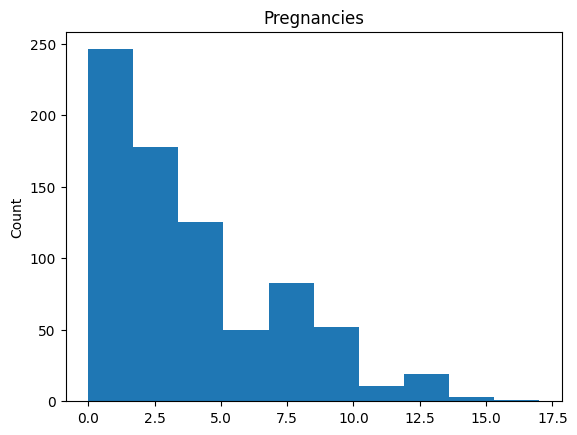

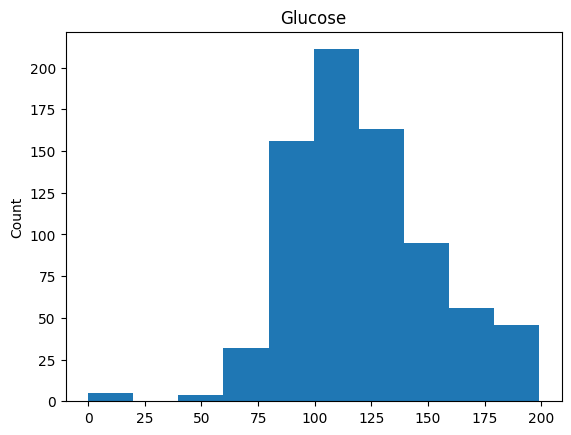

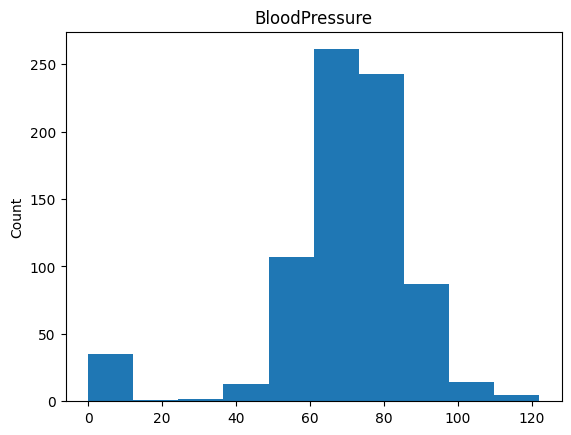

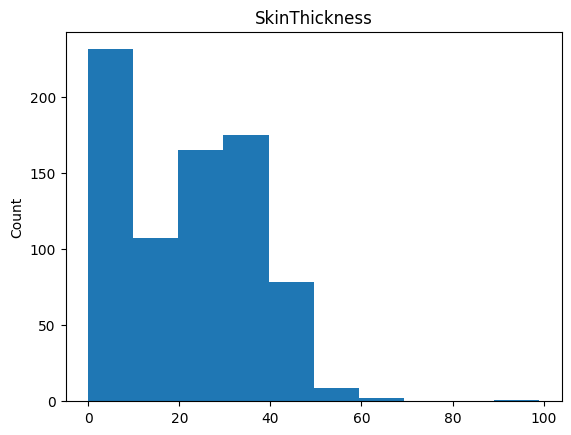

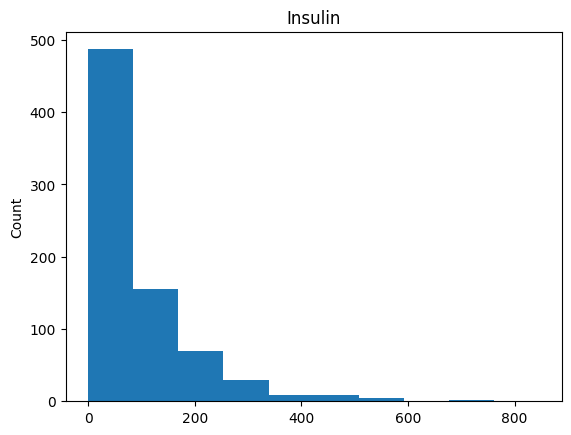

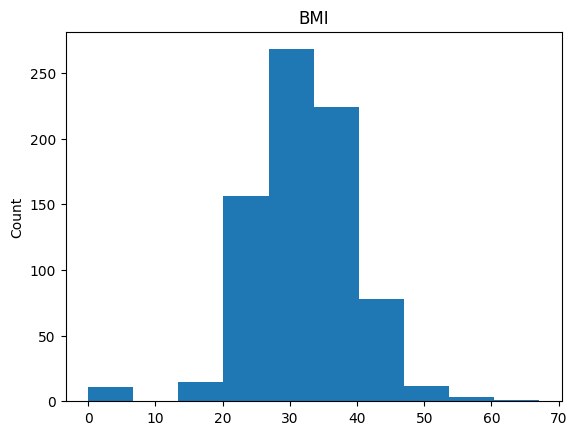

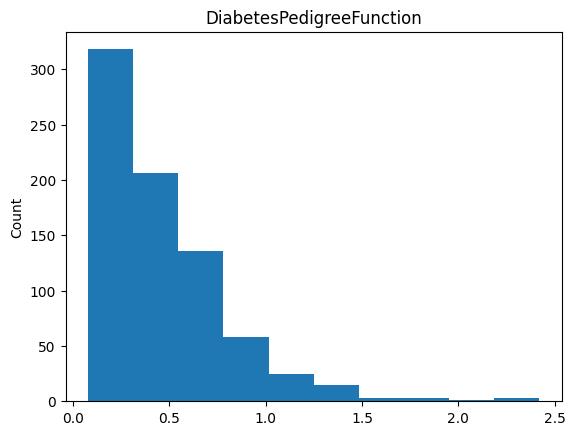

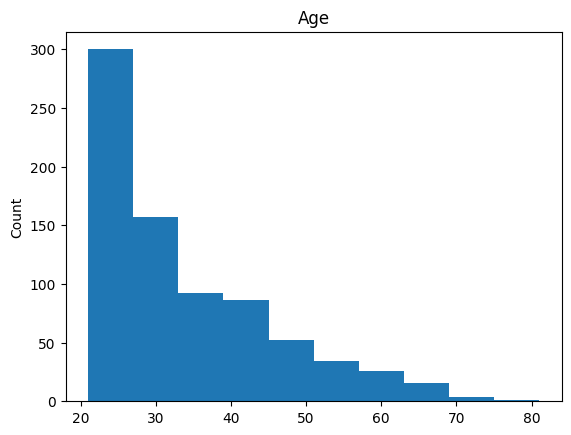

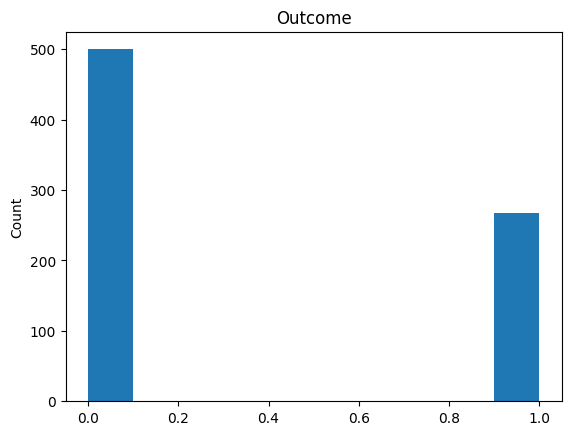

In [ ]:
# Histograms of Feature and Target Variables
for feat in input_df.columns:
  plt.figure()
  plt.hist(input_df[feat])
  plt.title(feat)
  plt.ylabel('Count')

In [ ]:
print("Number of Positive Diabities Observations: ", sum(input_df.Outcome == 1))
print("Number of Negative Diabities Observations: ", sum(input_df.Outcome == 0))

Number of Positive Diabities Observations:  268
Number of Negative Diabities Observations:  500


### Train/Test Sets

To ensure our ML model will perform well on data not previously seen or trained on, we will take 20% of the data and reserve it for model evaluation. The data is stratified on the target variable to ensure both the training and test sets have the same class ratios to ensure fair performance evaluation.

In [ ]:
target_variable = 'Outcome' # Target Variable from dataset
X = input_df.drop(columns=[target_variable])
y = input_df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)


### Feature Scaling
Standardizing feature data should result in better performance from our ML models, especially in certain types of models.

In [ ]:
# Scaler created on only the training set
# Scaler can be exported and used on the test set or any new set of data
training_scaler = StandardScaler().fit(X_train)

X_train_scaled = training_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled  = training_scaler.fit_transform(X_test)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)


### Feature Engineering

Analysis:

*   From the Feature histograms below, it can be shown that certain features are likely to be important in classification. Features like Pregnancies and Age are more positively skewed for the negative class meaning that lower feature values likely indicate a negative diabetes prediction.
*   This dataset has relatively few features. Feature Selection could be beneficial if there were a larger number of features.



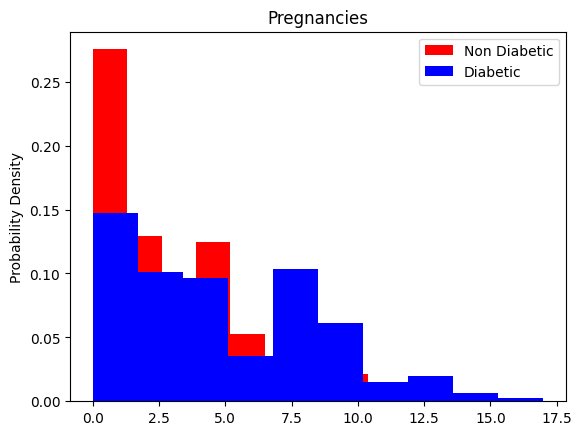

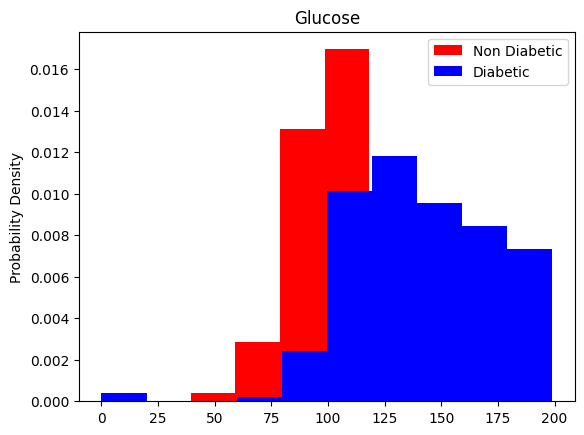

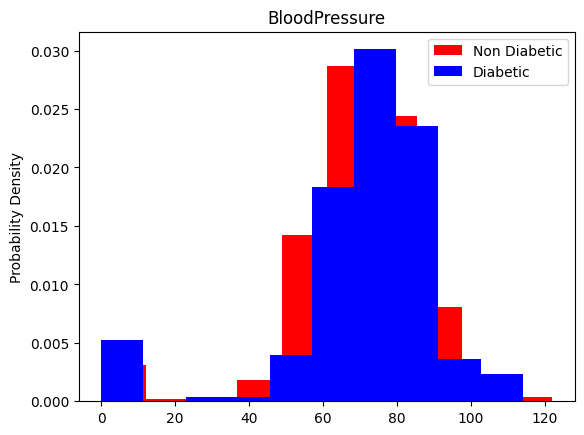

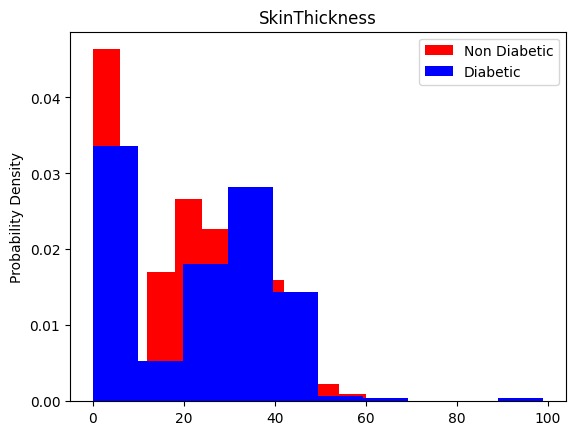

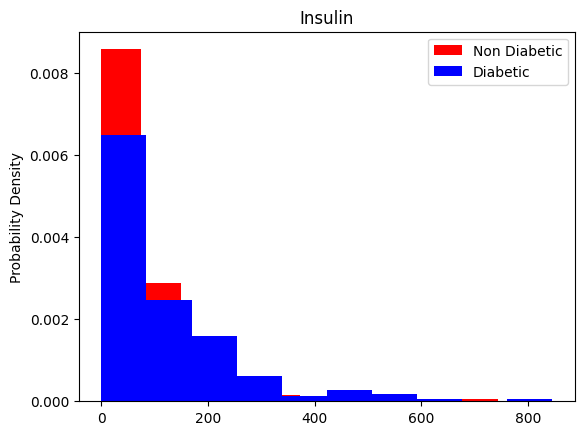

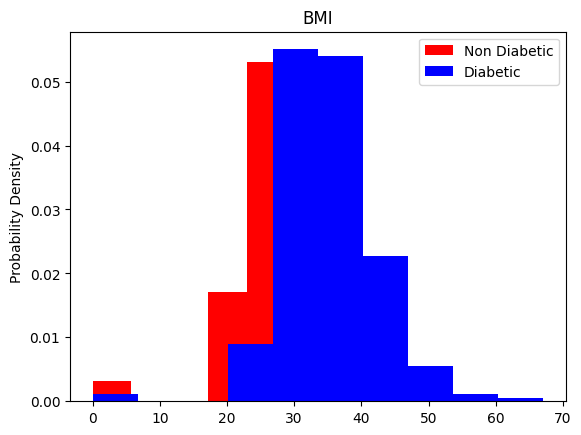

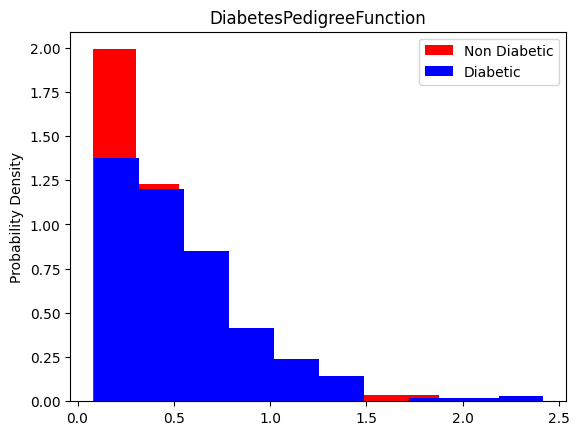

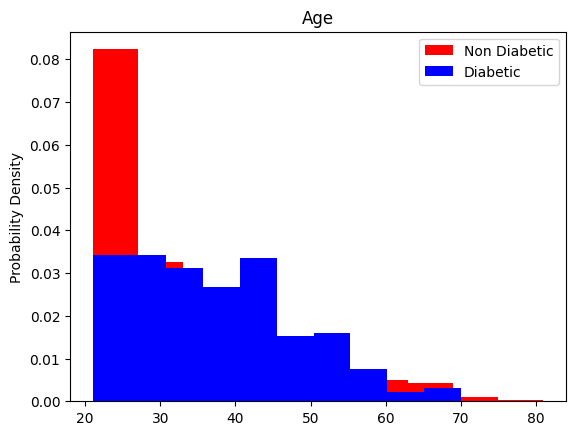

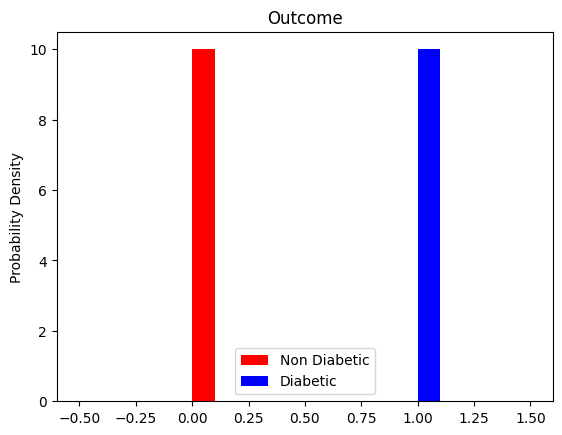

In [ ]:
# Plot histograms of features for both target variables to compare
for feat in input_df.columns:
  plt.figure()
  plt.hist(input_df[feat].loc[input_df['Outcome'] == 0], bins=10, color = 'red',
           density = True)
  plt.hist(input_df[feat].loc[input_df['Outcome'] == 1], bins=10, color = 'blue',
           density = True)
  plt.legend(["Non Diabetic", "Diabetic"])
  plt.title(feat)
  plt.ylabel('Probability Density')

## Machine Learning Classifier Model Training

### A/B Testing to choose classifer algorithm

We will be training multiple models with the default parameters to determine which model is most likely to perform the best for our classification problem. Both the Accuracy and AUC Score of the models will be observed.

Algorithms to choose from:

*   Linear SVM
*   Random Forest
*   Gradient Boost
*   XGBoost
*   Logistic Regression





In [ ]:
# Linear SVM
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state = 1)
svm_clf.fit(X_train, y_train)

print("SVM Training accuracy: ", svm_clf.score(X_train, y_train))
print("SVM Test accuracy: ", svm_clf.score(X_test, y_test))
print("SVM Training AUC: ", roc_auc_score(y_train, svm_clf.predict(X_train)))
print("SVM Test AUC: ", roc_auc_score(y_test, svm_clf.predict(X_test)))

SVM Training accuracy:  0.43485342019543977
SVM Test accuracy:  0.4675324675324675
SVM Training AUC:  0.5640771028037384
SVM Test AUC:  0.5900000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(random_state=1)
rfc_clf.fit(X_train, y_train)

print("Random Forest Training accuracy: ", rfc_clf.score(X_train, y_train))
print("Random Forest Test accuracy: ", rfc_clf.score(X_test, y_test))
print("Random Forest Training AUC: ", roc_auc_score(y_train, rfc_clf.predict(X_train)))
print("Random Forest Test AUC: ", roc_auc_score(y_test, rfc_clf.predict(X_test)))

Random Forest Training accuracy:  1.0
Random Forest Test accuracy:  0.7402597402597403
Random Forest Training AUC:  1.0
Random Forest Test AUC:  0.6849999999999999


In [ ]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train)

print("Gradiant Boost Training accuracy: ", gb_clf.score(X_train, y_train))
print("Gradiant Boost Test accuracy: ", gb_clf.score(X_test, y_test))
print("Gradiant Boost Training AUC: ", roc_auc_score(y_train, gb_clf.predict(X_train)))
print("Gradiant Boost Test AUC: ", roc_auc_score(y_test, gb_clf.predict(X_test)))



Gradiant Boost Training accuracy:  0.9022801302931596
Gradiant Boost Test accuracy:  0.7532467532467533
Gradiant Boost Training AUC:  0.8793691588785046
Gradiant Boost Test AUC:  0.7035185185185185


In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print("XGBoost Training accuracy: ", xgb_model.score(X_train, y_train))
print("XGBoost Test accuracy: ", xgb_model.score(X_test, y_test))
print("XGBoost Training AUC: ", roc_auc_score(y_train, xgb_model.predict(X_train)))
print("XGBoost Test AUC: ", roc_auc_score(y_test, xgb_model.predict(X_test)))

XGBoost Training accuracy:  1.0
XGBoost Test accuracy:  0.7272727272727273
XGBoost Training AUC:  1.0
XGBoost Test AUC:  0.6877777777777779


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=1, solver = 'liblinear')
lr_clf.fit(X_train, y_train)

print("Logistic Regression Training accuracy: ", lr_clf.score(X_train, y_train))
print("Logistic Regression Test accuracy: ", lr_clf.score(X_test, y_test))
print("Logistic Regression Training AUC: ", roc_auc_score(y_train, lr_clf.predict(X_train)))
print("Logistic Regression Test AUC: ", roc_auc_score(y_test, lr_clf.predict(X_test)))

Logistic Regression Training accuracy:  0.7768729641693811
Logistic Regression Test accuracy:  0.7662337662337663
Logistic Regression Training AUC:  0.7255373831775701
Logistic Regression Test AUC:  0.7092592592592593


In [ ]:
# Standardized Models

# Linear SVM
from sklearn.svm import LinearSVC
svm_clf_scaled = LinearSVC(random_state = 1)
svm_clf_scaled.fit(X_train_scaled, y_train)

print("SVM scaled Training accuracy: ", svm_clf_scaled.score(X_train_scaled, y_train))
print("SVM scaled Test accuracy: ", svm_clf_scaled.score(X_test_scaled, y_test))
print("SVM scaled Training AUC: ", roc_auc_score(y_train, svm_clf_scaled.predict(X_train_scaled)))
print("SVM scaled Test AUC: ", roc_auc_score(y_test, svm_clf_scaled.predict(X_test_scaled)))

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_clf_scaled = RandomForestClassifier(random_state=1)
rfc_clf_scaled.fit(X_train_scaled, y_train)

print("Random Forest scaled Training accuracy: ", rfc_clf_scaled.score(X_train_scaled, y_train))
print("Random Forest scaled Test accuracy: ", rfc_clf_scaled.score(X_test_scaled, y_test))
print("Random Forest scaled Training AUC: ", roc_auc_score(y_train, rfc_clf_scaled.predict(X_train_scaled)))
print("Random Forest scaled Test AUC: ", roc_auc_score(y_test, rfc_clf_scaled.predict(X_test_scaled)))

# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gb_clf_scaled = GradientBoostingClassifier(random_state=1)
gb_clf_scaled.fit(X_train_scaled, y_train)

print("Gradiant Boost scaled Training accuracy: ", gb_clf_scaled.score(X_train_scaled, y_train))
print("Gradiant Boost scaled Test accuracy: ", gb_clf_scaled.score(X_test_scaled, y_test))
print("Gradiant Boost scaled Training AUC: ", roc_auc_score(y_train, gb_clf_scaled.predict(X_train_scaled)))
print("Gradiant Boost scaled Test AUC: ", roc_auc_score(y_test, gb_clf_scaled.predict(X_test_scaled)))

# XGBoost
from xgboost import XGBClassifier
xgb_model_scaled = XGBClassifier(random_state=1)
xgb_model_scaled.fit(X_train_scaled, y_train)

print("XGBoost scaled Training accuracy: ", xgb_model_scaled.score(X_train_scaled, y_train))
print("XGBoost scaled Test accuracy: ", xgb_model_scaled.score(X_test_scaled, y_test))
print("XGBoost scaled Training AUC: ", roc_auc_score(y_train, xgb_model_scaled.predict(X_train_scaled)))
print("XGBoost scaled Test AUC: ", roc_auc_score(y_test, xgb_model_scaled.predict(X_test_scaled)))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_clf_scaled = LogisticRegression(random_state=1, solver = 'liblinear')
lr_clf_scaled.fit(X_train_scaled, y_train)

print("Logistic Regression scaled Training accuracy: ", lr_clf_scaled.score(X_train_scaled, y_train))
print("Logistic Regression scaled Test accuracy: ", lr_clf_scaled.score(X_test_scaled, y_test))
print("Logistic Regression scaled Training AUC: ", roc_auc_score(y_train, lr_clf_scaled.predict(X_train_scaled)))
print("Logistic Regression scaled Test AUC: ", roc_auc_score(y_test, lr_clf_scaled.predict(X_test_scaled)))

SVM scaled Training accuracy:  0.7850162866449512
SVM scaled Test accuracy:  0.7792207792207793
SVM scaled Training AUC:  0.7404789719626168
SVM scaled Test AUC:  0.7277777777777779
Random Forest scaled Training accuracy:  1.0
Random Forest scaled Test accuracy:  0.7402597402597403
Random Forest scaled Training AUC:  1.0
Random Forest scaled Test AUC:  0.6935185185185185
Gradiant Boost scaled Training accuracy:  0.9022801302931596
Gradiant Boost scaled Test accuracy:  0.7467532467532467
Gradiant Boost scaled Training AUC:  0.8793691588785046
Gradiant Boost scaled Test AUC:  0.7112962962962963
XGBoost scaled Training accuracy:  1.0
XGBoost scaled Test accuracy:  0.7467532467532467
XGBoost scaled Training AUC:  1.0
XGBoost scaled Test AUC:  0.7112962962962963
Logistic Regression scaled Training accuracy:  0.7866449511400652
Logistic Regression scaled Test accuracy:  0.7792207792207793
Logistic Regression scaled Training AUC:  0.7428154205607476
Logistic Regression scaled Test AUC:  0.727

Analysis:

*   Training data on standardized vs original data was approximately the same for Gradient Boosting, XGBoost, and Random Forest. This makes sense since Tree-based methods should be invariant to scaling.
*   The models with the largest difference between training and test performance were the Tree-based methods. This overtraining may be due to the class imbalance of the data provided. Overtraining can be reducing by oversampling the data to fix the class imbalance and modifying the model's depth/complexity.
*   One observation was that the SVM trained on the original data did not converge while the one trained on the standardized data did converge. This shows that fact that standardizing the data was more optimal for that algorithm and can reduce the convergence time.
*   The SVM and Logistic Regression methods seemed to perform fairly well. They maintain relatively high accuracy while having minimal degregation with the test set. Since they perform similarly, lets attempt to tune and utilize logistic regression



### Optimizing the Machine Learning Classifier
Optimization is done using GridSearchCV to iterate over a chosen hyperparameter and then to visually inspect how the performance changes on the training and test sets. KFold Cross Validation is done internally in GridSearchCV for Hyperparameter tuning. Ideally, parameters should be chosen so that there is an ideal tradeoff between the bias and variance. The test error should be low while the difference between the training and test error should also be low.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, make_scorer

param_range = [0.001,0.01,0.05,0.1,1]

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

gs = GridSearchCV(
    LogisticRegression(random_state=1, solver = 'liblinear'),
    param_grid = {"C": param_range},
    scoring = scoring,
    refit = "AUC",
    cv = 3,
    n_jobs = 2,
    return_train_score = True,
)
gs.fit(X_train_scaled, y_train)
results = gs.cv_results_
print(results)

{'mean_fit_time': array([0.00558503, 0.00501402, 0.00490975, 0.00524203, 0.00514634]), 'std_fit_time': array([4.40798679e-04, 2.55430197e-04, 4.98426000e-05, 1.47798026e-04,
       1.36086732e-04]), 'mean_score_time': array([0.00969481, 0.00749556, 0.00767255, 0.00778548, 0.0075237 ]), 'std_score_time': array([0.00206991, 0.00016169, 0.00013534, 0.0002586 , 0.00068381]), 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.05}, {'C': 0.1}, {'C': 1}], 'split0_test_AUC': array([0.79720134, 0.81610276, 0.8290518 , 0.83124478, 0.83416876]), 'split1_test_AUC': array([0.8397099 , 0.85400462, 0.85694766, 0.85684255, 0.85274333]), 'split2_test_AUC': array([0.82442021, 0.82759716, 0.82346712, 0.82209044, 0.81700731]), 'mean_test_AUC': array([0.82044381, 0.83256818, 0.83648886, 0.83672592, 0.8346398 ]), 'std_test_AUC': array([0.01758035, 0.01

In [ ]:
# Get the optimal set of parameters
print(gs.best_estimator_)

LogisticRegression(C=0.1, random_state=1, solver='liblinear')


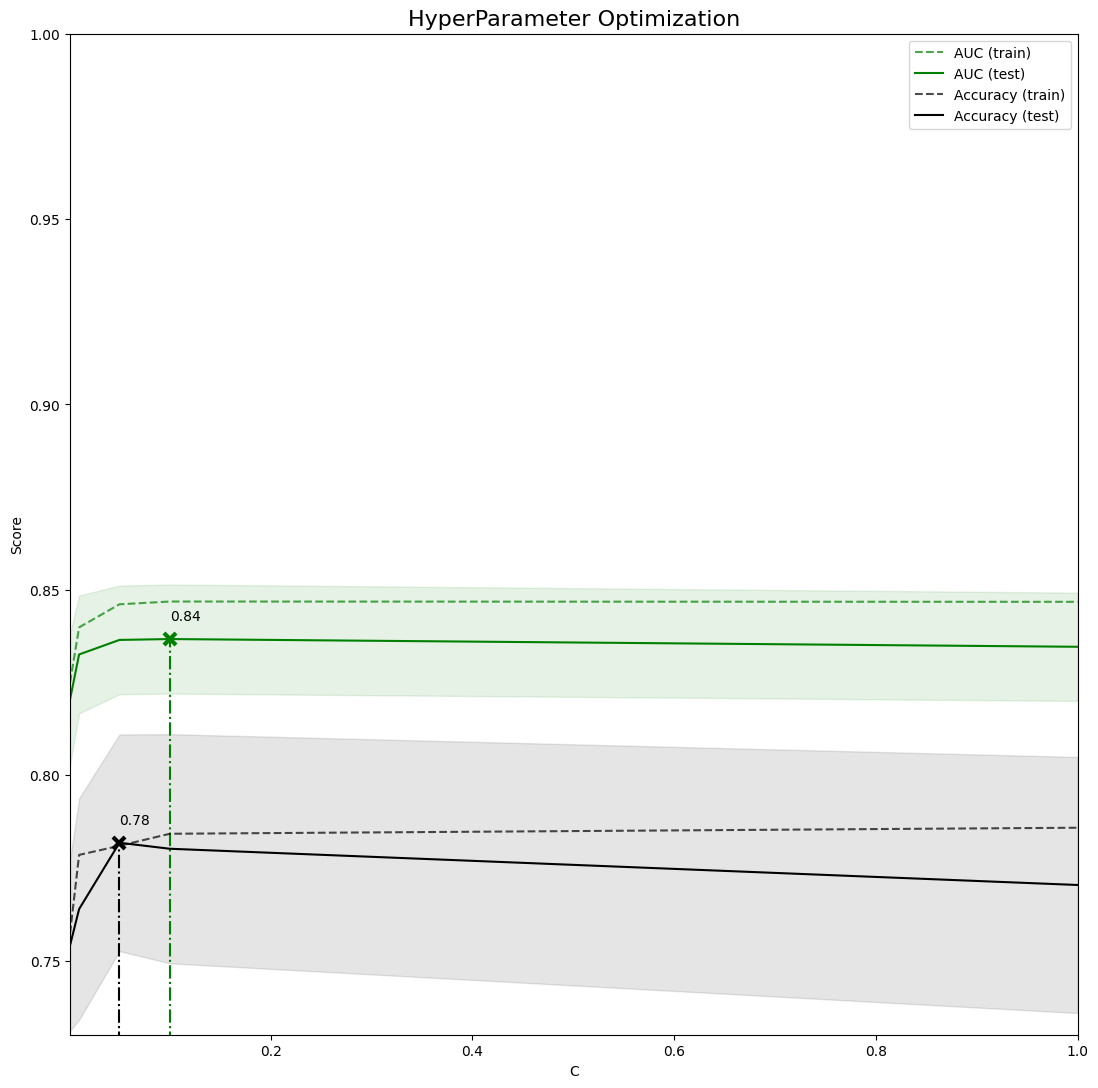

In [ ]:
# Plot GridSearch CV Results
plt.figure(figsize=(13, 13))
plt.title("HyperParameter Optimization", fontsize=16)

plt.xlabel("C")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(min(param_range), max(param_range))
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_C"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

### Model Training & Evaluation

The ROC curve is used to show performance of the model over different thresholds. This curve can be used to demonstrate the potential performance of the model for different TPR and FPR metrics. For our example, in order to get the TPR of the classifier above 75%, the curve shows us that we should expect at best a FPR of ~23%

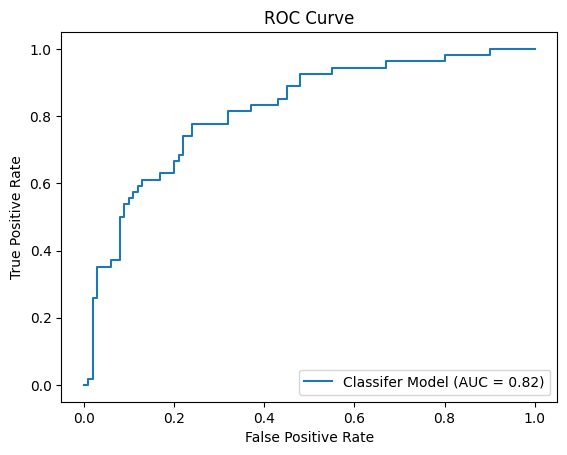

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
y_pred_prob = lr_clf_scaled.predict_proba(X_test_scaled)
y_pred_prob = y_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Classifer Model')
display.plot()
plt.title("ROC Curve")
plt.show()

In [ ]:
# Train Final Model
from sklearn.linear_model import LogisticRegression
classifier_model = LogisticRegression(C=0.1,
                                      random_state=1,
                                      class_weight = 'balanced',
                                      solver = 'liblinear',
                                      verbose = 10000)
classifier_model.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.1, class_weight='balanced', random_state=1,
                   solver='liblinear', verbose=10000)

In [ ]:
# Print Classifer Statistics
print("Logistic Regression scaled Training accuracy: ", classifier_model.score(X_train_scaled, y_train))
print("Logistic Regression scaled Test accuracy: ", classifier_model.score(X_test_scaled, y_test))
print("Logistic Regression scaled Training AUC: ", roc_auc_score(y_train, classifier_model.predict(X_train_scaled)))
print("Logistic Regression scaled Test AUC: ", roc_auc_score(y_test, classifier_model.predict(X_test_scaled)))

Logistic Regression scaled Training accuracy:  0.7654723127035831
Logistic Regression scaled Test accuracy:  0.7597402597402597
Logistic Regression scaled Training AUC:  0.7613317757009347
Logistic Regression scaled Test AUC:  0.7596296296296297


Analysis:

*   The final trained classifier seems to perform well. It maintains a high level of classification while not having much degredation of performance on the test set compared to the training set.



In [ ]:
# Classification Performance
from sklearn.metrics import classification_report
target_names = ["Non Diabetic", "Diabetic"]
print(classification_report(y_test, classifier_model.predict(X_test_scaled), target_names=target_names))

              precision    recall  f1-score   support

Non Diabetic       0.85      0.76      0.80       100
    Diabetic       0.63      0.76      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



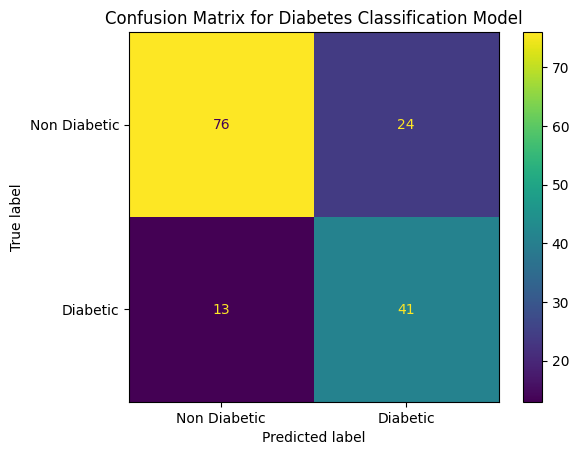

In [ ]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_model, X_test_scaled, y_test,
                                      display_labels=target_names)
plt.title("Confusion Matrix for Diabetes Classification Model")
plt.show()

Analysis:


*   The True Positive Rate for this classifier is 76% (TP/TP+FN)
*   The False Negative Rate is 24% (FN/FN+TP)
*   The overall accuracy of the model is 76% ((TP+TN)/(# of samples))
*   We have met the requirements for the project




### Model Explainability
Showing the feature importances derived from the model may give insights on what diagnostic features were important to classify the data. For models like Logistic Regression and Linear SVMs, the feature importances can be derived from the coefficients of the trained models.

Looking at the Feature Importance Plot, it looks as though high levels of glucose and higher numbers of BMI are strong indicators for Diabetes.

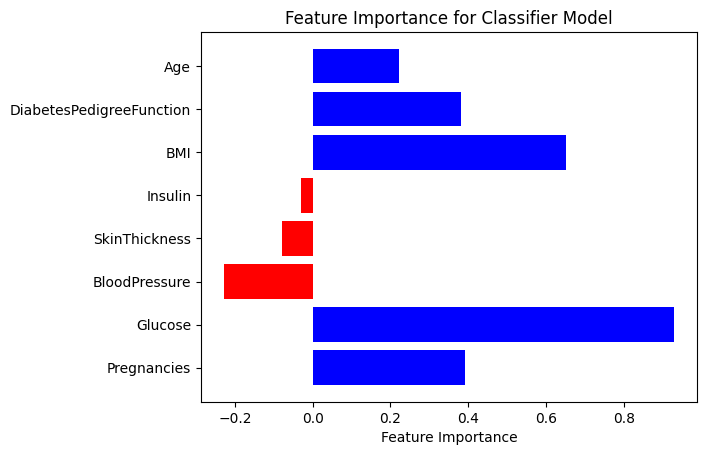

In [ ]:
# Feature Importance
feature_importance = classifier_model.coef_[0]
feature_names = classifier_model.feature_names_in_

color_feat = list()
for feat_coef in feature_importance:
  if(feat_coef >= 0):
    color_feat.append('blue')
  else:
    color_feat.append('red')

plt.barh(feature_names, feature_importance, color=color_feat)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Classifier Model")
plt.show()

## Future Improvements
Here is a list of the things that could be done to improve classifier performance

*   Obtain more data, especially from diabetic patients, to resolve the class imbalance while getting more information.
*   Obtain more data from patients with diverse backgrounds. Adding in more diverse data will result in most robust classifiers.
*   Get additional feature data or create derived features. This may result in better features that can be used by the classifier
*   Attempt to use and tune more algorithms like ensembles, etc.

